In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
from adtk.detector import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data_train = pd.read_csv(r'train.csv')
data_test = pd.read_csv(r'test.csv')

In [4]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data_train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
data_train.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [8]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
data_train.fillna(data_train.mode().iloc[0], inplace=True)

In [10]:
data_train.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Woo

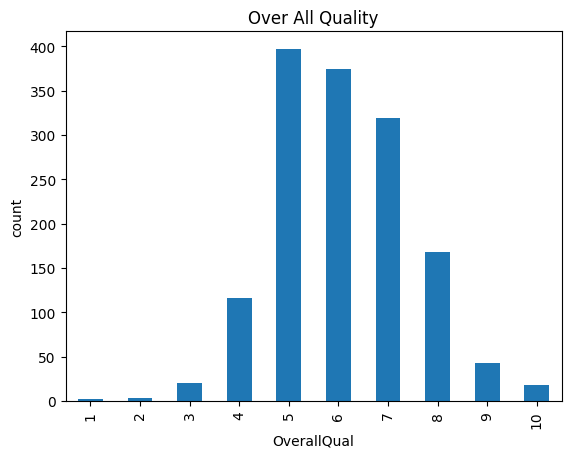

In [11]:
data_train['OverallQual'].value_counts() \
    .sort_index() \
    .plot(kind='bar', title='Over All Quality', ylabel='count')
plt.show()


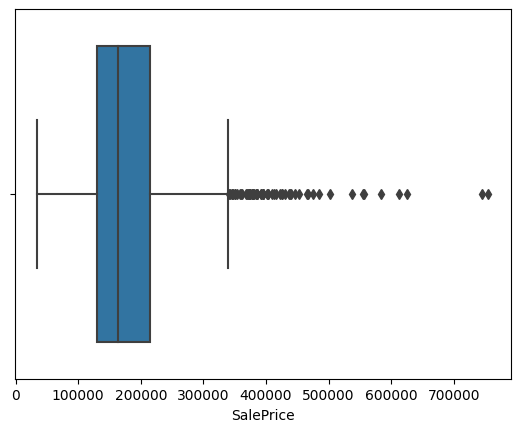

In [12]:
sns.boxplot(x=data_train['SalePrice'])
plt.show()

In [13]:
max_treshold = data_train['SalePrice'].quantile(0.95)
min_treshold = data_train['SalePrice'].quantile(0.05)

In [14]:
data_train.shape

(1460, 75)

In [15]:
data_train = data_train[(data_train['SalePrice'] < max_treshold) & (data_train['SalePrice'] > min_treshold)]

In [16]:
data_train.shape

(1312, 75)

In [17]:

label_encoder = LabelEncoder()
for col in data_train.columns:
    if data_train[col].dtype == 'object':
        data_train[col] = label_encoder.fit_transform(data_train[col])


In [18]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,11,13,196.0,2,3,2,2,2,3,2,706,5,0,150,856,0,0,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,7,8,0.0,3,3,1,2,2,1,0,978,5,0,284,1262,0,0,1,3,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,11,13,162.0,2,3,2,2,2,2,2,486,5,0,434,920,0,0,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,12,15,0.0,3,3,0,3,1,3,0,216,5,0,540,756,0,2,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,11,13,350.0,2,3,2,2,2,0,2,655,5,0,490,1145,0,0,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [19]:
correlation_matrix = data_train.corr()
correlation_matrix

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.012412,-0.008652,-0.008109,-0.021395,0.025357,0.028083,-0.014311,0.013786,0.051891,0.000046,0.000451,-0.015678,0.022308,0.016086,0.024085,-0.025366,0.002364,-0.022417,-0.031347,0.039588,-0.006843,-0.032827,-0.038124,-0.065045,0.001484,0.016678,-0.002132,0.049496,0.012427,-0.031202,0.016714,-0.010643,0.043062,-0.002337,-0.002832,-0.015514,0.058752,-0.000967,-0.009896,0.041303,0.011871,0.005990,-0.021071,0.012313,0.002811,-0.026235,0.001874,0.001938,0.035790,0.010858,-0.009619,0.039063,-0.004901,-0.018182,-0.004433,-0.002589,-0.007463,0.017756,0.016089,-0.023081,-0.009850,-0.028972,-0.031717,0.003320,0.010585,-0.069516,0.008429,0.052267,-0.006109,0.034089,-0.010648,0.007656,-0.002864,-0.034182
MSSubClass,0.012412,1.000000,-0.011954,-0.342652,-0.137917,-0.053189,0.109082,-0.028610,-0.024456,0.071134,-0.018991,0.020526,-0.025743,-0.039811,0.738949,0.388604,0.075872,-0.092129,0.032424,0.058666,-0.110547,-0.030821,-0.064207,-0.127393,0.042632,-0.072940,0.002561,0.072958,-0.086825,-0.027048,-0.066101,0.036543,-0.058539,0.065752,-0.084229,-0.122686,-0.231113,0.046041,0.001526,-0.143141,0.042858,-0.232798,0.321520,0.040312,0.119382,0.000100,-0.008873,0.163834,0.177717,-0.026744,0.289888,-0.032372,0.073746,-0.009312,-0.024304,0.101473,0.118841,-0.010748,-0.003390,-0.075899,0.001381,-0.008702,-0.088768,0.000324,0.010014,0.006031,-0.048621,-0.033599,0.008248,-0.022965,-0.011637,-0.033654,0.010096,-0.028567,-0.062191
MSZoning,-0.008652,-0.011954,1.000000,-0.069857,-0.023622,-0.020534,0.066339,-0.025988,-0.001344,-0.022313,-0.015413,-0.277382,-0.035519,0.021522,-0.032969,-0.138978,-0.208643,0.185785,-0.360059,-0.202140,0.018075,-0.005895,-0.001169,0.003503,-0.082948,0.217402,-0.132084,-0.259699,0.145914,-0.027762,0.038489,0.038185,-0.048649,-0.019911,0.017957,-0.034179,-0.082038,0.039564,0.172741,-0.080475,-0.123135,-0.039320,-0.064812,0.031493,-0.085296,-0.017144,0.003223,-0.229181,-0.166327,-0.021067,0.046200,0.134932,-0.035151,-0.083642,-0.002308,0.141529,-0.274754,0.169895,-0.154823,-0.196267,-0.150038,-0.112194,-0.145986,-0.005043,-0.137688,0.160287,-0.005689,0.011400,-0.003259,0.003842,-0.011219,-0.009915,0.065307,-0.031284,-0.248687
LotFrontage,-0.008109,-0.342652,-0.069857,1.000000,0.267518,-0.018781,-0.067144,-0.095760,-0.010129,-0.143346,0.037276,0.044490,-0.017812,-0.008036,-0.393216,0.016586,0.152877,-0.052744,0.057870,0.034075,0.124880,0.070675,0.061613,0.094688,0.124814,-0.125127,0.037206,0.048055,-0.110750,0.037520,-0.093097,-0.003722,0.167874,-0.037678,0.041118,0.107711,0.314825,-0.034552,-0.050604,0.031519,0.037645,0.367133,0.031623,0.032850,0.309164,0.060047,-0.013260,0.114840,0.013038,0.220345,0.009424,-0.122523,0.270616,0.013479,0.162901,-0.200917,-0.005013,-0.142424,0.200205,0.269277,0.038827,0.023152,0.066068,0.029323,0.094009,0.020379,0.058816,0.031079,0.163991,-0.013244,0.009624,0.009505,-0.019058,0.046688,0.255641
LotArea,-0.021395,-0.137917,-0.023622,0.267518,1.000000,-0.290934,-0.185602,-0.177023,0.013213,-0.151608,0.441915,-0.015181,0.023657,0.037309,-0.224835,-0.044669,0.042159,-0.003575,-0.019926,-0.009443,0.029010,0.153498,0.028697,0.007894,0.083264,-0.024159,0.005139,-0.037846,-0.021804,0.011325,-0.140000,-0.

In [20]:
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
correlation_with_target

SalePrice        1.000000
OverallQual      0.764029
GrLivArea        0.622572
GarageCars       0.595701
GarageArea       0.575396
FullBath         0.552001
YearBuilt        0.534419
YearRemodAdd     0.512605
TotalBsmtSF      0.510739
1stFlrSF         0.488296
TotRmsAbvGrd     0.429421
GarageYrBlt      0.420729
Fireplaces       0.416697
Foundation       0.385770
MasVnrArea       0.331020
OpenPorchSF      0.318577
2ndFlrSF         0.286074
WoodDeckSF       0.283865
LotFrontage      0.255641
HalfBath         0.252802
BsmtFinSF1       0.239270
LotArea          0.234756
BsmtUnfSF        0.231692
Electrical       0.217461
CentralAir       0.197676
HouseStyle       0.192691
PavedDrive       0.185832
SaleCondition    0.175422
BsmtFullBath     0.166356
BedroomAbvGr     0.138651
Neighborhood     0.135173
Exterior2nd      0.125598
GarageCond       0.121884
Exterior1st      0.119269
Condition1       0.116911
RoofStyle        0.101170
GarageQual       0.100668
Functional       0.099093
ScreenPorch 

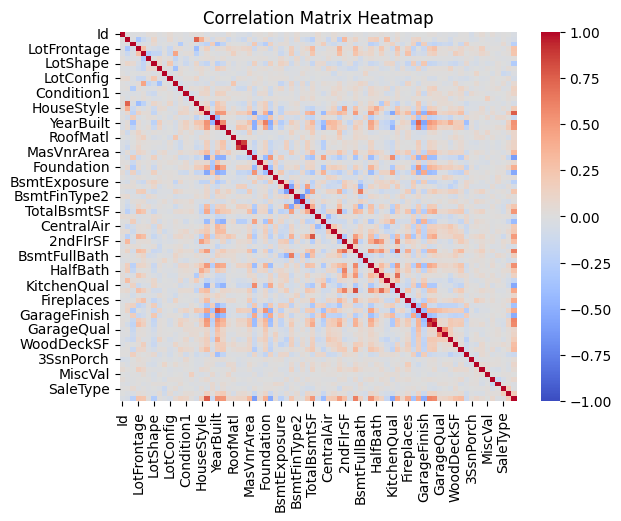

In [45]:
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title('Correlation Matrix Heatmap')
# plt.show()
#save the correlation matrix heatmap
plt.savefig('correlation_matrix_heatmap.png')

In [22]:
selected_columns = correlation_with_target[correlation_with_target > 0.5].index.to_list
selected_columns

<bound method IndexOpsMixin.tolist of Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF'],
      dtype='object')>

In [23]:
data_train = data_train[['Id','OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]

In [24]:
data_train.head()

,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,7,2003,2003,856,856,1710,2,8,2,548,208500
1,2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,3,7,2001,2002,920,920,1786,2,6,2,608,223500
3,4,7,1915,1970,756,961,1717,1,7,3,642,140000
4,5,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [25]:
X = data_train.drop('SalePrice', axis=1)
y = data_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [26]:
model_XGB = XGBRegressor(n_estimators=10000, max_depth=7, eta=0.01, subsample=0.7, colsample_bytree=0.8)
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [27]:
    y_pred_XGB = model_XGB.predict(X_test)
    print("MAE:",mean_absolute_error(y_test,y_pred_XGB))
    print("MSE:",mean_squared_error(y_test,y_pred_XGB))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_XGB)))
    print("R2 Score:",r2_score(y_test,y_pred_XGB))

MAE: 16204.629544914449
MSE: 486395194.4547688
RMSE: 22054.36905592107
R2 Score: 0.8236375423491963


In [28]:
model_Linear_Regression = LinearRegression()
model_Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred_Linear_Regression = model_Linear_Regression.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_Linear_Regression))
print("MSE:",mean_squared_error(y_test,y_pred_Linear_Regression))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_Linear_Regression)))
print("R2 Score:",r2_score(y_test,y_pred_Linear_Regression))

MAE: 17899.84644611655
MSE: 557739834.7959453
RMSE: 23616.516144341556
R2 Score: 0.7977686270016935


In [30]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(f_regression, k='all')),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x00000136441419D0>)),
                ('model', LinearRegression())])

In [31]:
y_pred_pipeline = pipeline.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_pipeline))
print("MSE:",mean_squared_error(y_test,y_pred_pipeline))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_pipeline)))
print("R2 Score:",r2_score(y_test,y_pred_pipeline))

MAE: 17187.749376913023
MSE: 534023338.35329235
RMSE: 23108.9449857256
R2 Score: 0.8063680121255155


In [32]:
model_Random_Forest = RandomForestRegressor()
model_Random_Forest.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred_Random_Forest = model_Random_Forest.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred_Random_Forest))
print("MSE:",mean_squared_error(y_test,y_pred_Random_Forest))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_Random_Forest)))
print("R2 Score:",r2_score(y_test,y_pred_Random_Forest))

MAE: 15895.050266159695
MSE: 491771658.18046236
RMSE: 22175.925193336632
R2 Score: 0.8216880856790978


In [34]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [35]:
data_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [36]:
data_test.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [37]:
data_test.fillna(data_test.mode().iloc[0], inplace=True)

In [38]:
data_test = data_test[['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]

In [39]:
test_predict = model_XGB.predict(data_test)
test_predict


array([131862.08 , 153340.3  , 168066.56 , ..., 146645.02 , 107464.984,
       232756.58 ], dtype=float32)

In [40]:
XGB_pred = pd.DataFrame({'Id': data_test['Id'], 'SalePrice':test_predict})
XGB_pred.to_csv('submission.csv', index=False)
XGB_pred.head()

,Id,SalePrice
0,1461,131862.078125
1,1462,153340.296875
2,1463,168066.562500
3,1464,180011.921875
4,1465,197502.234375


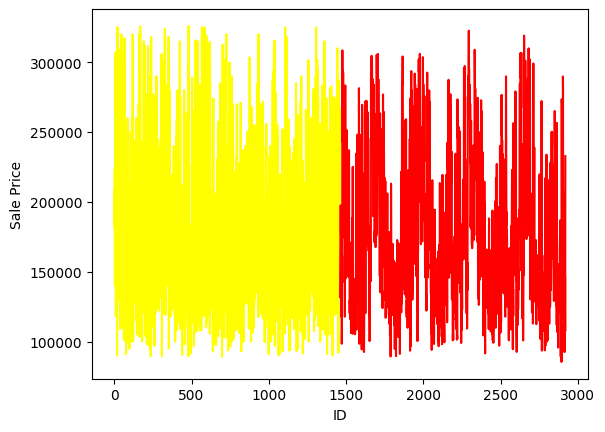

In [41]:
plt.plot(data_train['Id'],
         data_train['SalePrice'],
         linestyle='-',
         color = 'yellow')
plt.plot(XGB_pred['Id'],
         XGB_pred['SalePrice'],
         linestyle='-',
         color = 'red')
plt.ylabel('Sale Price')
plt.xlabel('ID')
plt.show()
